In [115]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gensim
from gensim.models import word2vec  
from sklearn.manifold import TSNE  
import re  
import nltk  
from nltk.corpus import stopwords  
from nltk.stem.porter import *  
stemmer = PorterStemmer()  
from collections import Counter
from nltk.stem import PorterStemmer


In [4]:
data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv',delimiter = ',')
df = pd.DataFrame(data)
df.head()
df.shape[0]
df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [72]:
df = df.dropna(subset = "Summary")
df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Tokin
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",demonstr flight u armi flyer flown orvil wrigh...
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,first u dirig akron explod offshor altitud ft ...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,first fatal airplan accid canada occur america...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,airship flew thunderstorm encount sever downdr...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,hydrogen ga vent suck forward engin ignit caus...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",approach militari transport crash hous skid ri...
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,cargo plane crash approach isiro matari airport
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,airbu went miss atlantiocean flight rio de jan...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,air ambul crash hill attempt land heavi fog mi...


In [118]:
def rewiew_to(raw):
    letters_only = re.sub("[^a-zA-Z]", " ",raw)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    m_words = [w for w in words if not w in stops]
    lemma = nltk.wordnet.WordNetLemmatizer()
    singles = [lemma.lemmatize(word) for word in m_words]
    return (" ".join(singles))

In [188]:
proc = [rewiew_to(text) for text in df["Summary"]]

In [189]:
def str_to_lst(text):
    res = []
    for elem in text:
        res.append([w for w in elem.split()])
    return res

In [190]:
res = str_to_lst(proc)

In [191]:
model = word2vec.Word2Vec(res, window=5, min_count=40, workers=4)  
len(model.wv)

377

In [192]:
def show_model(model):
    labeles = []
    tokens = []
    for word in model.wv.key_to_index:
        tokens.append(model.wv[word])
        labeles.append(word)
    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=40, n_components=2,init='pca', max_iter=2500)
    new_values = tsne_model.fit_transform(tokens)
    tok_val = {}
    for l,t in zip(labeles,new_values):
        tok_val[l] = t
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(8,8))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labeles[i],xy = (x[i],y[i]),xytext = (5,2),
        textcoords= 'offset points',ha = 'right',va = 'bottom')
    plt.show()
    return (new_values,tok_val)    

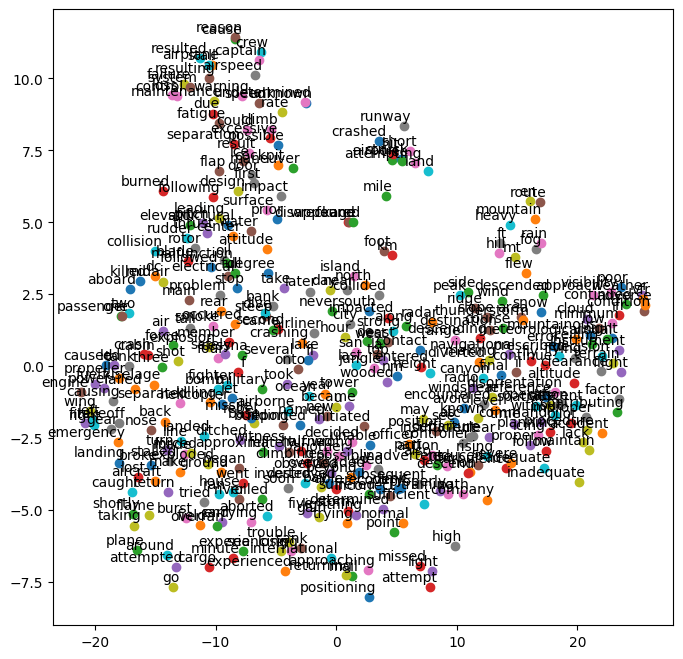

In [193]:
show = show_model(model)
n_val = show[0]
accordance = show[1]

In [194]:
ac = pd.DataFrame.from_dict(accordance,orient="index")
ac


,0,1
crashed,3.588534,7.833879
aircraft,-15.062696,-3.975693
plane,-16.510277,-6.390397
pilot,19.442831,-1.988759
flight,23.631741,-0.199369
...,...,...
fell,-6.095556,-2.974990
f,-8.127719,-0.192652
lightning,1.646031,-5.153454
sank,-2.901220,-6.323210


In [195]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.sql.functions import UserDefinedFunction
from pyspark.sql.types import *
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import pyspark.sql.functions as sf
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

In [196]:
from pyspark import SparkContext, SparkConf, HiveContext
from pyspark.sql.functions import col, asc, desc

conf = SparkConf().setAppName('spark_dlab_app') 

# запуск сессии спарка
spark = SparkSession.builder.config(conf = conf).enableHiveSupport().getOrCreate()
spark

In [197]:
nv = pd.DataFrame(n_val)
nv.to_csv("Vectors.csv",header = False,index = False)

In [198]:
nd  = spark.read.csv("Vectors.csv", sep=",",inferSchema=True)
nd.show()

+----------+-----------+
|       _c0|        _c1|
+----------+-----------+
| 3.5885336|  7.8338795|
|-15.062696| -3.9756932|
|-16.510277|  -6.390397|
| 19.442831| -1.9887594|
|  23.63174|-0.19936891|
|-21.133924|-0.89749414|
| 21.319365|  2.4788153|
| 5.6341524|   8.330523|
|-12.665304|   9.792178|
|-6.2275224| 10.9222765|
|-18.038715| -3.3467517|
| 16.514061|  5.1121235|
| 4.6269155|  7.1763983|
| 19.716776| -0.5872717|
| 25.340197|   2.460828|
| 25.521576|  1.9096459|
|-13.234503|  9.3899355|
|-18.042793| -1.9760461|
|-16.739046|  -5.537115|
|  7.620688|   6.765323|
+----------+-----------+
only showing top 20 rows



In [199]:
from pyspark.ml.feature import VectorAssembler 
from pyspark.sql import SQLContext
sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)

vec_assembler = VectorAssembler(inputCols = nd.columns, 
                                outputCol='features') 
  
final_data = vec_assembler.transform(nd) 
final_data.select('features').show(5)


C:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyspark\sql\context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+--------------------+
|            features|
+--------------------+
|[3.5885336,7.8338...|
|[-15.062696,-3.97...|
|[-16.510277,-6.39...|
|[19.442831,-1.988...|
|[23.63174,-0.1993...|
+--------------------+
only showing top 5 rows



In [200]:
from pyspark.ml.feature import StandardScaler 
  
scaler = StandardScaler(inputCol="features",  
                        outputCol="scaledFeatures",  
                        withStd=True,  
                        withMean=False) 
  
# Compute summary statistics by fitting the StandardScaler 
scalerModel = scaler.fit(final_data) 
  
# Normalize each feature to have unit standard deviation. 
final_data = scalerModel.transform(final_data) 
pf_final = final_data.toPandas()

final_data.show()
final_data.select('scaledFeatures').show(5)

+----------+-----------+--------------------+--------------------+
|       _c0|        _c1|            features|      scaledFeatures|
+----------+-----------+--------------------+--------------------+
| 3.5885336|  7.8338795|[3.5885336,7.8338...|[0.29597068344349...|
|-15.062696| -3.9756932|[-15.062696,-3.97...|[-1.2423226104450...|
|-16.510277|  -6.390397|[-16.510277,-6.39...|[-1.3617144249482...|
| 19.442831| -1.9887594|[19.442831,-1.988...|[1.60358202557902...|
|  23.63174|-0.19936891|[23.63174,-0.1993...|[1.94906973666318...|
|-21.133924|-0.89749414|[-21.133924,-0.89...|[-1.7430579248646...|
| 21.319365|  2.4788153|[21.319365,2.4788...|[1.75835250076280...|
| 5.6341524|   8.330523|[5.6341524,8.330523]|[0.46468672787481...|
|-12.665304|   9.792178|[-12.665304,9.792...|[-1.0445934464427...|
|-6.2275224| 10.9222765|[-6.2275224,10.92...|[-0.5136259727058...|
|-18.038715| -3.3467517|[-18.038715,-3.34...|[-1.4877750641633...|
| 16.514061|  5.1121235|[16.514061,5.1121...|[1.36202651707025

In [201]:
#Importing the model 
from pyspark.ml.clustering import KMeans 
from pyspark.ml.evaluation import ClusteringEvaluator 
  
silhouette_score=[] 
  
evaluator = ClusteringEvaluator(predictionCol='prediction', 
                                featuresCol='scaledFeatures',  
                                metricName='silhouette',  
                                distanceMeasure='squaredEuclidean') 
  
for i in range(2,10): 
    kmeans=KMeans(featuresCol='scaledFeatures', k=i) 
    model=kmeans.fit(final_data) 
    predictions=model.transform(final_data) 
    score=evaluator.evaluate(predictions) 
    silhouette_score.append(score) 
    print('Silhouette Score for k =',i,'is',score)

Silhouette Score for k = 2 is 0.4548185668516061
Silhouette Score for k = 3 is 0.6201958352819839
Silhouette Score for k = 4 is 0.5637554365321841
Silhouette Score for k = 5 is 0.5694321003173662
Silhouette Score for k = 6 is 0.542521279001714
Silhouette Score for k = 7 is 0.5133654595220323
Silhouette Score for k = 8 is 0.5592344475193836
Silhouette Score for k = 9 is 0.5527239605683478


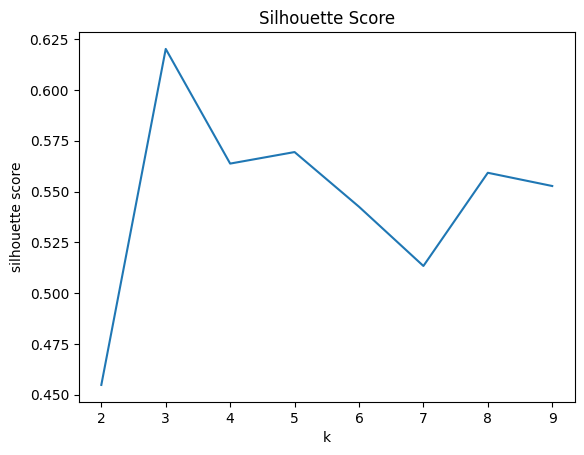

In [202]:
import matplotlib.pyplot as plt 
  
plt.plot(range(2,10),silhouette_score) 
plt.xlabel('k') 
plt.ylabel('silhouette score') 
plt.title('Silhouette Score') 
plt.show()

In [204]:
kmeans = KMeans(featuresCol='scaledFeatures',k=7) 
model = kmeans.fit(final_data)
predictions = model.transform(final_data)
predictions.show()
c = predictions.select("_c0").toPandas()
c = list(c["_c0"])

+----------+-----------+--------------------+--------------------+----------+
|       _c0|        _c1|            features|      scaledFeatures|prediction|
+----------+-----------+--------------------+--------------------+----------+
| 3.5885336|  7.8338795|[3.5885336,7.8338...|[0.29597068344349...|         3|
|-15.062696| -3.9756932|[-15.062696,-3.97...|[-1.2423226104450...|         5|
|-16.510277|  -6.390397|[-16.510277,-6.39...|[-1.3617144249482...|         5|
| 19.442831| -1.9887594|[19.442831,-1.988...|[1.60358202557902...|         1|
|  23.63174|-0.19936891|[23.63174,-0.1993...|[1.94906973666318...|         1|
|-21.133924|-0.89749414|[-21.133924,-0.89...|[-1.7430579248646...|         0|
| 21.319365|  2.4788153|[21.319365,2.4788...|[1.75835250076280...|         1|
| 5.6341524|   8.330523|[5.6341524,8.330523]|[0.46468672787481...|         3|
|-12.665304|   9.792178|[-12.665304,9.792...|[-1.0445934464427...|         3|
|-6.2275224| 10.9222765|[-6.2275224,10.92...|[-0.5136259727058..

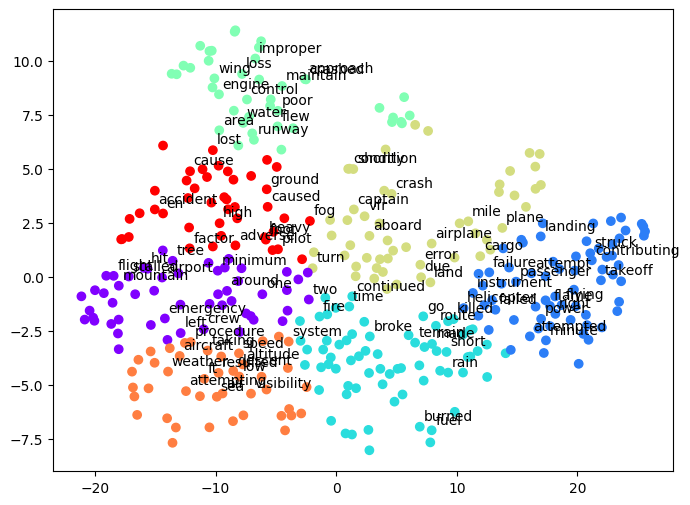

In [205]:
x = final_data.select("_c0").toPandas()
y = final_data.select("_c1").toPandas()
x1 = list(x["_c0"])
y1 = list(y["_c1"])
pred = predictions.select("prediction").toPandas()
pred = list(pred["prediction"])
words = list(accordance.keys())
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
for i,word in zip(range(130,len(x1)-150),words):
    ax.annotate(word,(x1[i],y1[i]),xytext = (x1[i]+0.3,y1[i]+0.3))

plt.scatter(x1, y1, c = pred, cmap="rainbow")
plt.show()

In [206]:
ac["Predictions"] = pred
ac

,0,1,Predictions
crashed,3.588534,7.833879,3
aircraft,-15.062696,-3.975693,5
plane,-16.510277,-6.390397,5
pilot,19.442831,-1.988759,1
flight,23.631741,-0.199369,1
...,...,...,...
fell,-6.095556,-2.974990,5
f,-8.127719,-0.192652,0
lightning,1.646031,-5.153454,2
sank,-2.901220,-6.323210,5


In [207]:
centers = model.clusterCenters() 
print("Cluster Centers: ") 
for center in centers: 
    print(center)
centers[0]

Cluster Centers: 
[-1.03851994 -0.21763528]
[ 1.5387846  -0.06940909]
[ 0.36040327 -0.90695694]
[-0.47138226  1.9868741 ]
[0.55739955 0.56930902]
[-0.82195888 -1.14503859]
[-0.81530457  0.74933798]


array([-1.03851994, -0.21763528])

In [208]:
clas = list(zip(words,pred))

sorted(clas,key = lambda clas:clas[1])

[('engine', 0),
 ('landing', 0),
 ('takeoff', 0),
 ('fire', 0),
 ('left', 0),
 ('air', 0),
 ('wing', 0),
 ('right', 0),
 ('failed', 0),
 ('fuel', 0),
 ('emergency', 0),
 ('power', 0),
 ('caused', 0),
 ('helicopter', 0),
 ('crash', 0),
 ('turn', 0),
 ('shot', 0),
 ('nose', 0),
 ('gear', 0),
 ('took', 0),
 ('causing', 0),
 ('led', 0),
 ('landed', 0),
 ('propeller', 0),
 ('three', 0),
 ('line', 0),
 ('force', 0),
 ('ocean', 0),
 ('back', 0),
 ('military', 0),
 ('cabin', 0),
 ('tank', 0),
 ('fighter', 0),
 ('four', 0),
 ('fuselage', 0),
 ('ditched', 0),
 ('base', 0),
 ('jet', 0),
 ('member', 0),
 ('building', 0),
 ('fl', 0),
 ('explosion', 0),
 ('killing', 0),
 ('several', 0),
 ('onto', 0),
 ('separated', 0),
 ('cessna', 0),
 ('bomb', 0),
 ('rebel', 0),
 ('safely', 0),
 ('missile', 0),
 ('airborne', 0),
 ('f', 0),
 ('pilot', 1),
 ('flight', 1),
 ('approach', 1),
 ('altitude', 1),
 ('weather', 1),
 ('condition', 1),
 ('poor', 1),
 ('accident', 1),
 ('low', 1),
 ('flying', 1),
 ('terrain', 1